# Установка нужных зависимостей

In [ ]:
!pip install opencv-python

!pip install numpy

!pip install matplotlib

!pip install scikit-image

# Импортируем библиотеки

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import io

In [ ]:
image_height = 600
image_width = 800
dpi = 100

In [ ]:
urls = [
    f"https://placekitten.com/{image_width}/{image_height}"
    ]

In [ ]:
images = list()

for url in urls:
    image = io.imread(url)
    images.append(image)

In [ ]:
img = images[0]
plt.imshow(img)

In [ ]:
type(img)

In [ ]:
img.shape

In [ ]:
img[:, :, 0]

In [ ]:
plt.imshow(img[:, :, 0], cmap='gray')

In [ ]:
plt.imshow(img[:, :, 1], cmap='gray')


# Увеличение и уменьшение изображения

In [ ]:
zoom_in = cv2.resize(img, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)

zoom_in.shape

In [ ]:
plt.imshow(zoom_in)


In [ ]:
cv2.imwrite('sample_data/big_kitten.png', cv2.cvtColor(zoom_in, cv2.COLOR_RGB2BGR))

## Попробуем разные методы интерполяции

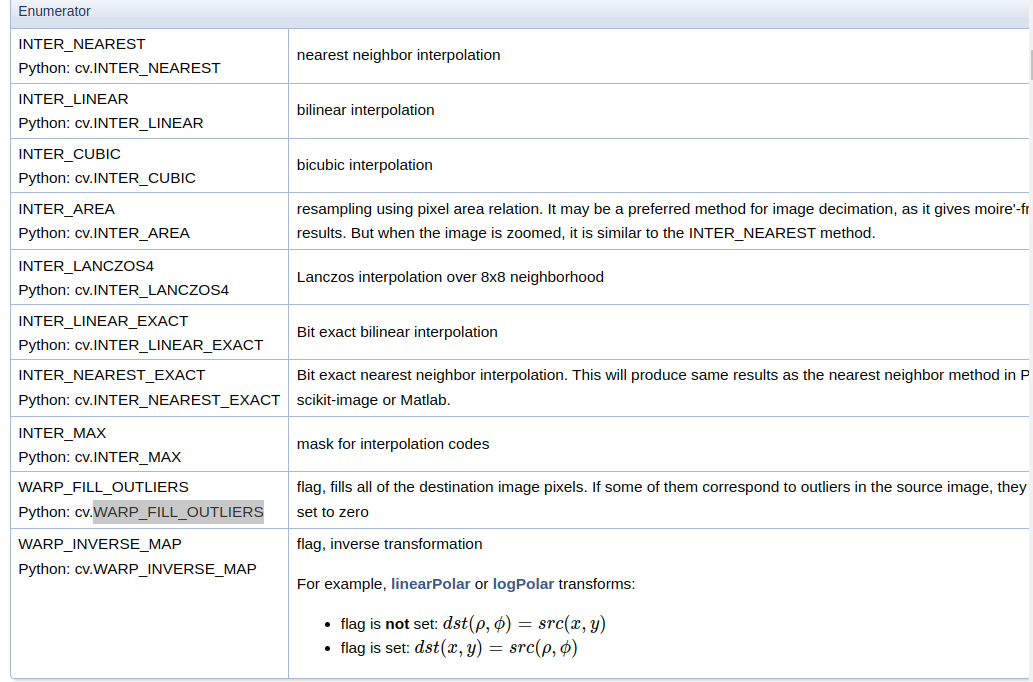

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Методы интерполяции
interpolation_methods = [
    (cv2.INTER_NEAREST, 'Nearest'),
    (cv2.INTER_LINEAR, 'Linear'),
    (cv2.INTER_CUBIC, 'Cubic'),
    (cv2.INTER_LANCZOS4, 'Lanczos4')
]

fx = 0.1
fy = 0.1

for method, label in interpolation_methods:
    resized_img = cv2.resize(img, (0,0), fx=fx, fy=fy, interpolation=method)
    fig = plt.figure(figsize=(image_width // dpi * 2, image_height// dpi))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Original')
    #
    fig.add_subplot(1, 2, 2)
    plt.imshow(resized_img)
    plt.title(f'Resized: {label}')
    plt.show()

# Перевод изображения в другие цветовые пространства

In [ ]:

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)


plt.figure(figsize=(10, 4))

plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.subplot(142), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(143), plt.imshow(hsv), plt.title('HSV')
plt.subplot(144), plt.imshow(lab), plt.title('LAB')
plt.show()

In [ ]:
plt.imshow(hsv[:, :, 2], cmap='gray')

### Арифметические операции над изображениями


In [ ]:
!wget -O cat1.png https://freepngimg.com/save/84802-medium-pusheen-cat-sized-to-cats-kitten/512x512
!wget -O cat2.png https://freepngimg.com/save/84796-medium-like-pusheen-cat-sized-to-cats/512x512


#### Сложение:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cat_1 = cv2.imread('cat1.png')
cat_2 = cv2.imread('cat2.png')

cat_1 = cv2.cvtColor(cat_1, cv2.COLOR_BGR2RGB)
cat_2 = cv2.cvtColor(cat_2, cv2.COLOR_BGR2RGB)

# add (+):
cat_add = cv2.add(cat_1, cat_2)

plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(cat_1), plt.title('Pusheen 1')
plt.subplot(132), plt.imshow(cat_2), plt.title('Pusheen 2')
plt.subplot(133), plt.imshow(cat_add), plt.title('Result')
plt.show()

#### Сложение с весовыми коэффициентами
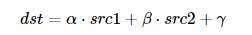

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

CAT_1_COEF = .3
CAT_2_COEF = .7
GAMMA = .0

cat_1 = cv2.imread('cat1.png')
cat_2 = cv2.imread('cat2.png')

cat_1 = cv2.cvtColor(cat_1, cv2.COLOR_BGR2RGB)
cat_2 = cv2.cvtColor(cat_2, cv2.COLOR_BGR2RGB)

# add (+):
cat_add = cv2.addWeighted(cat_1, CAT_1_COEF, cat_2, CAT_2_COEF, GAMMA)

plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(cat_1), plt.title('Pusheen 1')
plt.subplot(132), plt.imshow(cat_2), plt.title('Pusheen 2')
plt.subplot(133), plt.imshow(cat_add), plt.title('Result')
plt.show()

#### Побитовые операции

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(40, 6))

rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
plt.subplot(161), plt.imshow(rectangle, cmap='gray'), plt.title('rectangle')

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plt.subplot(162), plt.imshow(circle, cmap='gray'), plt.title('circle')

img_and = cv2.bitwise_and(rectangle, circle)
plt.subplot(163), plt.imshow(img_and, cmap='gray'), plt.title('and')

img_or = cv2.bitwise_or(rectangle, circle)
plt.subplot(164), plt.imshow(img_or, cmap='gray'), plt.title('or')

img_xor = cv2.bitwise_xor(rectangle, circle)
plt.subplot(165), plt.imshow(img_xor, cmap='gray'), plt.title('xor')

img_not = cv2.bitwise_not(circle)
plt.subplot(166), plt.imshow(img_not, cmap='gray'), plt.title('not')

plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


cat_1 = cv2.imread('cat1.png')

cat = cv2.cvtColor(cat_1, cv2.COLOR_BGR2RGB)
cat_not = cv2.bitwise_not(cat)

cat_gray = cv2.cvtColor(cat_1, cv2.COLOR_BGR2GRAY)
cat_not_g = cv2.bitwise_not(cat_gray)
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 4, 1)
plt.imshow(cat)
fig.add_subplot(1, 4, 2)
plt.imshow(cat_not)
fig.add_subplot(1, 4, 3)
plt.imshow(cat_gray, cmap='gray')
fig.add_subplot(1, 4, 4)
plt.imshow(cat_not_g, cmap='gray')
plt.show()

#### А зачем?
cv2.absdiff и немного магии....

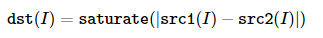


In [ ]:
!wget https://h5p.org/sites/default/files/h5p/content/175363/images/backgroundImage-5a67e26a62f25.jpg -O magic.jpg

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('magic.jpg')
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_g, cmap='gray')


In [ ]:
h, w = img_g.shape

img_l = img_g[:, :w//2]
img_r = img_g[:, w//2:]

res = cv2.absdiff(img_l, img_r)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(img_l, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(img_r, cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(res, cmap='gray')


In [ ]:
_, res_tresholded = cv2.threshold(res, 50, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(8, 8))
plt.imshow(res_tresholded, cmap='gray')